Regularization in Logistic Regression

In [1]:
#Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
import warnings 
warnings.filterwarnings('ignore')

In [3]:
#load and read the dataset 
df = pd.read_csv("/Users/karnikabhardwaj/Downloads/land_type.csv")
df.head()
    

,latitude,longitude,land_type
0,-3.226989,-0.356542,0.0
1,-1.496209,0.416730,1.0
2,0.995726,-0.887490,1.0
3,0.633447,-1.898605,1.0
4,-0.076218,-0.794730,1.0


In [6]:
# Assign the variable 'X' to the predictors & 'y' to the response 

x = df.drop("land_type", axis=1).values

y = df['land_type']

In [7]:
#split the dataset into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x,y,train_size=0.8, random_state= 22)


In [9]:
#make a logistic regression model with degree 10
degree = 10

#make a list of C values to vary the range of regularizations
Clist = [2,4,6,7,9,10]

validation_accuracy = []

for i in Clist:
    
    #for each i, make a logistic regression model
    lr = LogisticRegression(C=i, max_iter = 16000)
    
    #Use the polynomial features to make a response variable of degree 10
    x_poly_train = PolynomialFeatures(degree).fit_transform(x_train)
    x_poly_val = PolynomialFeatures(degree).fit_transform(x_val)
    
    #fit the model on the training data
    lr.fit(x_poly_train, y_train)
    
    #predict the model on the validation data
    y_val_pred = lr.predict(x_poly_val)
    
    #append the validation accuracy using the 'accuracy_score' function
    validation_accuracy.append(accuracy_score(y_val, y_val_pred))
    
    print("Accuracy = ", validation_accuracy)

Accuracy =  [0.675]
Accuracy =  [0.675, 0.725]
Accuracy =  [0.675, 0.725, 0.7]
Accuracy =  [0.675, 0.725, 0.7, 0.725]
Accuracy =  [0.675, 0.725, 0.7, 0.725, 0.7]
Accuracy =  [0.675, 0.725, 0.7, 0.725, 0.7, 0.75]


In [11]:
#find the best C value with the highest validation error
best_C = Clist[4]

print(f"The best C value from the list above is {best_C}")

The best C value from the list above is 9


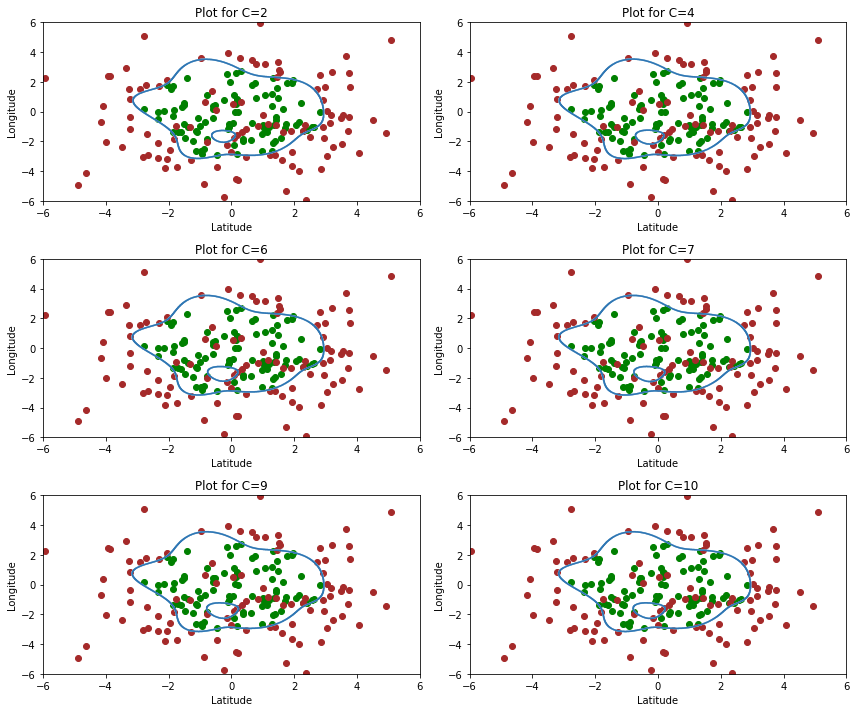

In [14]:
#plotting 
def plot_boundary(x, y, model, title, ax, plot_data=True, fill=True, color='Greens',degree=0):
    
    
    if plot_data:
        # PLOT DATA
        ax.scatter(x[y==1,0], x[y==1,1], c='green')
        ax.scatter(x[y==0,0], x[y==0,1], c='brown')
    
    # CREATE MESH
    interval = np.arange(min(x.min(), y.min()),max(x.max(), y.max()),0.01)
    n = np.size(interval)
    x1, x2 = np.meshgrid(interval, interval)
    x1 = x1.reshape(-1,1)
    x2 = x2.reshape(-1,1)
    
    xx = np.concatenate((x1, x2), axis=1)

    # PREDICT ON MESH POINTS
    xxpoly = PolynomialFeatures(degree).fit_transform(xx)
    yy = model.predict(xxpoly)    
    yy = yy.reshape((n, n))

    # PLOT DECISION SURFACE
    x1 = x1.reshape(n, n)
    x2 = x2.reshape(n, n)
    if fill:
        ax.contourf(x1, x2, yy, alpha=0.5, cmap=color)
    else:
        ax.contour(x1, x2, yy, alpha=0.5, cmap=color)
    
    # LABEL AXIS, TITLE
    ax.set_title(title)
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Longitude')
    
    
    return ax


# The helper function below, fits a Logistic Regression model, and plots the boundary around it using the function above

def fit_and_plot_dt(x, y, c, title, ax, plot_data=True, fill=True, color='Blues',degree=0):

    lreg = LogisticRegression(C=c, max_iter=6000)

    x1 = PolynomialFeatures(degree).fit_transform(x)
    lreg.fit(x1, y)

    # PLOT DECISION TREE BOUNDARY
    ax = plot_boundary(x, y, lreg, title, ax, plot_data, fill, color,degree=degree)
    
    return ax

fig, ax = plt.subplots(nrows=int(len(Clist)/2), ncols=2,figsize=(12, 10))

ax = ax.ravel()

for i,d in enumerate(Clist):
    ax[i] = fit_and_plot_dt(x, y, d, 'Satellite',ax[i], plot_data=True, fill=False,degree=6) 
    ax[i].set_xlim(-6, 6)
    ax[i].set_ylim(-6, 6)
    ax[i].set_title(f'Plot for C={d}')
plt.tight_layout()
plt.show() 


Relation between degree and C value

In [16]:
# Make a logistic regression model with below C values

# Choose a range of degree values to compute polynomial features
degree_range = [5,10,20,30]

# Dictionary to store the best c value for each degree
degree_best_c = {}

# Make a list of 6 C values to vary the range of regularization such that you get the best accuracy
Clist = [2,4,6,7,9,10]


# Run a loop for each degree
for degree in degree_range:
    
    #List to store validation accuracy
    validation_accuracy = []
    
    #Run loop for each C value in the list
    for i in Clist:

        # For each i in Clist, make a logistic regression model, with max_iter = 16000    
        lr = LogisticRegression(C=i, max_iter=16000)

        # Use Polynomial features to make a response variable of degree 10

        X_poly_train = PolynomialFeatures(degree).fit_transform(x_train)

        X_poly_val = PolynomialFeatures(degree).fit_transform(x_val)

        # Fit the model on the training data

        lr.fit(X_poly_train, y_train)

        # Predict the model on the validation data
        y_val_pred = lr.predict(X_poly_val)

        # Append the validation accuracy using the `accuracy_score` function
        validation_accuracy.append(accuracy_score(y_val, y_val_pred))

        # Find the best C value for specific degrees
        best_C = Clist[validation_accuracy.index(max(validation_accuracy))]
    
    # Add the degree and best C value to the dictionary
    degree_best_c[degree] = best_C

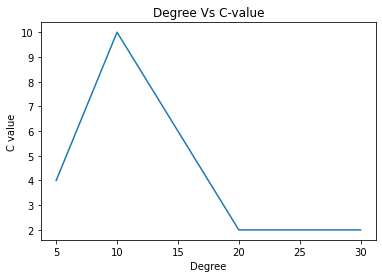

In [20]:

plt.plot(degree_best_c.keys(), degree_best_c.values())
plt.xlabel("Degree")
plt.ylabel("C value")
plt.title("Degree Vs C-value")
plt.show()